In [1]:
import gym             # openAi gym
from gym import envs   # envs
import numpy as np 
import pandas as pd 
import random
import sys
import matplotlib
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Taxi-v3')   # Here you set the environment
env._max_episode_steps = 50000
env.reset()

308

In [3]:
print(env.nS)  # Print the number of states
print(env.nA)  # Print the number of actions

500
6


In [4]:
def policy_eval(policy, env, gamma = 1.0, num_iter = 10):
    """
    >>> Policy Evaluation Algorithm <<<
    It computes the value function given a policy and the environment model.
    
    INPUT:
        policy: (nS x nA) matrix representing the policy;
        env: OpenAI env. env.P represents the transition probabilities of the environment;
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done);
            env.nS is a number of states in the environment;
            env.nA is a number of actions in the environment;
        gamma: The discount factor;
        num_iter: The number of iterations used to estimate the value function.
    
    OUTPUT:
        V: Vector of length env.nS representing the value function.
    """
    
#   Initialize the value fuction vector with 0's
    V = np.zeros(env.nS)
    
    counter = 0
    
    while counter < num_iter:
        counter += 1
        
#       For every action in every state, compute the value function (Bellman's eqn.)       
        for s in range(env.nS):
            vNew = 0
            for a in range(env.nA):
                for prob, nextState, reward, done in env.P[s][a]:
#                   Eq. (3.14) from "Reinforcement Learning, an Introduction", Sutton, R.S., Barto,A.G.                  
                    vNew+=policy[s][a] * prob * (reward + gamma*V[nextState])
            
            V[s] = vNew
    
    return np.array(V)

In [5]:
def policy_iteration(env, policy_eval_fn = policy_eval, gamma = 1.0):
    """
    >>> Policy Improvement Algorithm <<<
    It evaluates and improves a policy iteratively to find an optimal policy.
    
    INPUT:
        env: The OpenAI gym environment.
        policy_eval_fn(policy, env, gamma): Policy Evaluation function (3 args);
        gamma: The discount factor.
        
    OUTPUT:
        policy: a (nS,nA) matrix representing the optimal policy
        V: a value function corresponding to the optimal policy.
    """
    
    def one_step_lookahead(state, V):
        """
        >>> Compute Action <<<
        It calculates all the action values in a given state.
        
        INPUT:
            state: A given state
            V: the value function (length of nS)
        
        OUTPUT:
            A: vector contening the expected value of each action (length of nA).
        """
        
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, nextState, reward, done in env.P[state][a]:
                A[a] += prob * (reward + gamma * V[nextState])

        return A


#   Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    
    numIterations = 0

    while True:
        numIterations += 1
        
        V = policy_eval_fn(policy, env, gamma)
        policyStable = True
        
        for s in range(env.nS):
            oldAction = np.argmax(policy[s])

            qValues = one_step_lookahead(s, V)
            newAction = np.argmax(qValues)

            if oldAction != newAction:
                policyStable = False
                        
            policy[s] = np.zeros([env.nA])
            policy[s][newAction] = 1

        if policyStable:
            print(numIterations)
            return policy, V
    
    return policy, np.zeros(env.env.nS)

In [6]:
env.reset()
policyPI, valuePI = policy_iteration(env, gamma = 0.95)

13


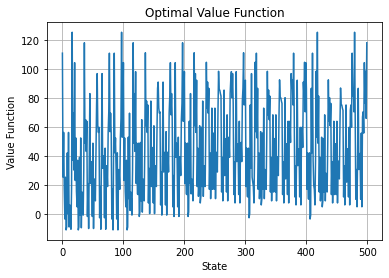

In [7]:
# Data for plotting
idx = np.arange(0, 1, env.nS)

fig, ax = plt.subplots()
ax.plot(valuePI)

ax.set(xlabel='State', ylabel='Value Function',
       title='Optimal Value Function')
ax.grid()

fig.savefig("value_function.png")
plt.show()

In [8]:
# Taxi in action! 
# Ref.: https://fakabbir.github.io/reinforcement-learning/docs/opentaxi-v2/

# Parameters
total_episodes = 5        # Total episodes
total_test_episodes = 2   # Total test episodes
max_steps = 99            # Max steps per episode
env.reset() 

#state = env.encode(4, 0, 4, 2)   # encode(row_tx, col_tx, pass_idx, dest_idx)
#print("State:", state)

rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        # UNCOMMENT IT IF YOU WANT TO SEE OUR AGENT PLAYING
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(policyPI[state,:])

        new_state, reward, done, info = env.step(action)

        total_rewards += reward

        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+------